<!-- 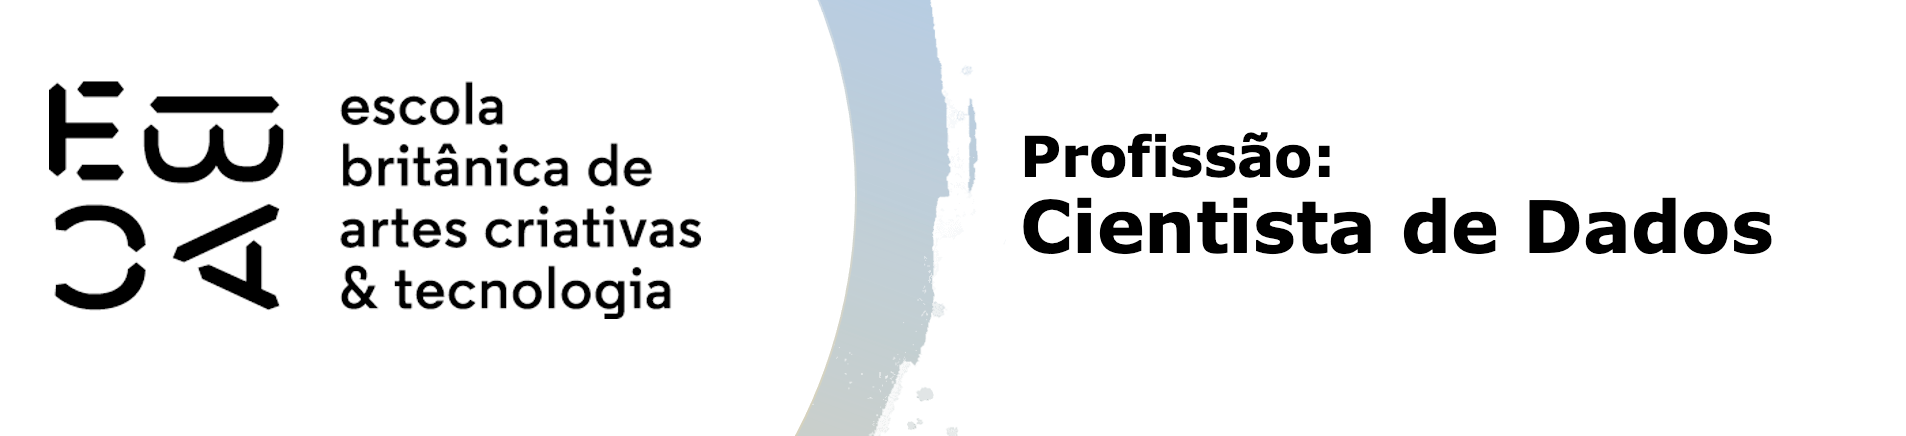 -->

[![ebac_logo-data_science.png](https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/ebac_logo-data_science.png)](https://github.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados)
<!-- <img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/ebac_logo-data_science.png" alt="ebac_logo-data_science"> -->

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 36** | Descritiva IV - Visualização de dados categorizados | Exercício 2

**Aluno:** [Roberto Hatiro Nishiyama](https://www.linkedin.com/in/rhatiro/)<br>
**Data:** 8 de Outubro de 2024.

---

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [4]:
import numpy as np  # Biblioteca para cálculos numéricos e manipulação de arrays
import pandas as pd  # Biblioteca para manipulação de dados estruturados (DataFrames)
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos e visualizações


In [5]:
df = pd.read_pickle(filepath_or_buffer="../Exercício 1/Dados/base_nfp.pkl")  
# Carrega o DataFrame a partir de um arquivo pickle

df  # Exibe o DataFrame carregado


,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.00,Liberado,2021,2,0.000000,0,não definido
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Farmácia
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.00,Liberado,2021,2,0.000000,0,Mercado


In [6]:
df = df[df["Data Emissão"] >= pd.to_datetime(arg="2020-01-01", format="%Y-%m-%d")]
# Filtra o DataFrame para manter apenas os registros com data de emissão a partir de 01/01/2020

print(f"Menor data de emissão: {df['Data Emissão'].min()}")  # Exibe a menor data de emissão no DataFrame
print(f"Maior data de emissão: {df['Data Emissão'].max()}")  # Exibe a maior data de emissão no DataFrame


Menor data de emissão: 2020-01-01 00:00:00
Maior data de emissão: 2021-12-31 00:00:00


---

## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [9]:
df = (
    df
    .assign(DiaSemana=df["Data Emissão"].dt.day_name(locale="pt_BR"))
    # Cria uma coluna 'DiaSemana' com o nome do dia da semana em português

    .assign(DummyFDS=df["Data Emissão"].dt.dayofweek.isin([5, 6]).astype(int))
    # Cria a coluna 'DummyFDS' indicando finais de semana (0 para dias úteis, 1 para sábado e domingo)

    .assign(DiaMes=df["Data Emissão"].dt.day)
    # Cria a coluna 'DiaMes' com o dia do mês

    .assign(Mes=df["Data Emissão"].dt.month)
    # Cria a coluna 'Mes' com o número do mês

    .assign(Trimestre=df["Data Emissão"].dt.quarter)
    # Cria a coluna 'Trimestre' com o trimestre do ano

    .assign(Semestre=df['Data Emissão'].dt.month.apply(lambda x: 1 if x <= 6 else 2))
    # Cria a coluna 'Semestre' classificando o mês em primeiro ou segundo semestre

    .assign(Ano=df["Data Emissão"].dt.year)
    # Cria a coluna 'Ano' com o ano da data de emissão
)

# Exibe os valores únicos ordenados para cada uma das novas colunas criadas
for x in df[["DiaSemana", "DummyFDS", "DiaMes", "Mes", "Trimestre", "Semestre", "Ano"]].columns:
    print(f"{x}: {sorted(df[x].unique())}")


DiaSemana: ['Domingo', 'Quarta feira', 'Quinta feira', 'Segunda feira', 'Sexta feira', 'Sábado', 'Terça feira']
DummyFDS: [0, 1]
DiaMes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Mes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Trimestre: [1, 2, 3, 4]
Semestre: [1, 2]
Ano: [2020, 2021]


In [10]:
df = (
    df
    .assign(**{"Valor NF 5cat": pd.qcut(x=df["Valor NF"], q=5)})
    # Cria uma coluna 'Valor NF 5cat' categorizando 'Valor NF' em 5 faixas de valores

    .assign(**{"Valor NF 10cat": pd.qcut(x=df["Valor NF"], q=10)})
    # Cria uma coluna 'Valor NF 10cat' categorizando 'Valor NF' em 10 faixas de valores

    .assign(**{"Valor NF 20cat": pd.qcut(x=df["Valor NF"], q=20)})
    # Cria uma coluna 'Valor NF 20cat' categorizando 'Valor NF' em 20 faixas de valores

    .assign(**{"Valor NF 50cat": pd.qcut(x=df["Valor NF"], q=50)})
    # Cria uma coluna 'Valor NF 50cat' categorizando 'Valor NF' em 50 faixas de valores
)

# Exibe o número de categorias únicas em cada nova coluna de categorização
for x in df.iloc[:, -4:].columns:
    print(f"{x}: {df[x].nunique()} categorias")


Valor NF 5cat: 5 categorias
Valor NF 10cat: 10 categorias
Valor NF 20cat: 20 categorias
Valor NF 50cat: 50 categorias


---

## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [13]:
metadados = pd.DataFrame({"dtype": df.dtypes})
# Cria um DataFrame 'metadados' com os tipos de dados de cada coluna do DataFrame original

metadados["papel"] = metadados.index.map(lambda x: "resposta" if x in ["Retorno", "flag_credito"] else "covariavel")
# Adiciona uma coluna 'papel' para identificar se uma coluna é uma variável de resposta ou covariável

metadados["nunique"] = df.nunique()
# Adiciona uma coluna 'nunique' com o número de valores únicos em cada coluna do DataFrame original

metadados  # Exibe o DataFrame 'metadados'


,dtype,papel,nunique
CNPJ emit.,object,covariavel,16010
Emitente,object,covariavel,12196
No.,int64,covariavel,71685
Data Emissão,datetime64[ns],covariavel,731
Valor NF,float64,covariavel,28381
Data Registro,datetime64[ns],covariavel,734
Créditos,float64,covariavel,7845
Situação do Crédito,category,covariavel,3
Ano,int32,covariavel,2
Semestre,int64,covariavel,2


In [14]:
def IV(tabela: pd.DataFrame, variavel: str, resposta: str) -> float:
    """
    Calcula o Information Value (IV) para uma variável em relação à variável de resposta.

    Args:
        tabela (pd.DataFrame): O DataFrame contendo os dados.
        variavel (str): O nome da variável para a qual calcular o IV.
        resposta (str): O nome da variável de resposta (binária).

    Returns:
        float: O valor do IV calculado.
    """
    tab = pd.crosstab(index=tabela[variavel], columns=tabela[resposta], margins=True, margins_name="Total")
    # Cria uma tabela cruzada entre a variável e a resposta, com totais

    tab["perc_nao_evento"] = tab[0] / tab.loc["Total", 0]
    # Calcula a proporção de não eventos (resposta = 0) para cada categoria da variável

    tab["perc_evento"] = tab[1] / tab.loc["Total", 1]
    # Calcula a proporção de eventos (resposta = 1) para cada categoria da variável

    tab["WOE"] = np.log(tab["perc_evento"].replace(0, np.nan) / tab["perc_nao_evento"].replace(0, np.nan))
    # Calcula o Weight of Evidence (WOE) para cada categoria da variável

    tab["IV parcial"] = (tab["perc_evento"] - tab["perc_nao_evento"]) * tab["WOE"]
    # Calcula o IV parcial para cada categoria da variável

    return tab["IV parcial"].sum()
    # Retorna o IV total, somando os IVs parciais


In [15]:
%%time
# Mede o tempo de execução desta célula

metadados["IV"] = [f"{IV(tabela=df, variavel=x, resposta='flag_credito'):.2%}" for x in metadados.index]
# Calcula o Information Value (IV) para cada variável e formata o resultado como percentual

metadados  # Exibe o DataFrame 'metadados' atualizado com a nova coluna 'IV'


CPU times: user 11.6 s, sys: 203 ms, total: 11.8 s
Wall time: 12.3 s


,dtype,papel,nunique,IV
CNPJ emit.,object,covariavel,16010,116.35%
Emitente,object,covariavel,12196,207.02%
No.,int64,covariavel,71685,4.69%
Data Emissão,datetime64[ns],covariavel,731,11.47%
Valor NF,float64,covariavel,28381,40.45%
Data Registro,datetime64[ns],covariavel,734,11.06%
Créditos,float64,covariavel,7845,0.00%
Situação do Crédito,category,covariavel,3,0.00%
Ano,int32,covariavel,2,0.32%
Semestre,int64,covariavel,2,0.05%


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
> <font color="red">As variáveis `Data Emissão` e `categoria` se destacam como as que apresentam o maior poder de discriminação, conforme indicado pelos valores do IV. Esses resultados sugerem que essas variáveis têm uma capacidade significativa de diferenciar entre os eventos de interesse.</red>
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?
> <font color="red">A análise das categorizações por quantis da variável `Valor NF` sugere que, à medida que aumentamos o número de categorias, há uma tendência de aumento na relação entre a variável e o IV. Isso indica que uma maior discretização da variável contínua pode proporcionar uma melhor captura das variações nos dados e, consequentemente, uma maior capacidade de discriminação.</red>

<font color="red">**Conclusão:** As variáveis `Data Emissão` e `categoria` demonstram um significativo poder de discriminação de acordo com o IV. A categorização da variável `Valor NF` em quantis reforça a ideia de que um número maior de categorias pode melhorar a relação entre a variável e o IV, sugerindo que a discretização adequada de variáveis contínuas pode aumentar a eficiência na modelagem.</font>

---

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

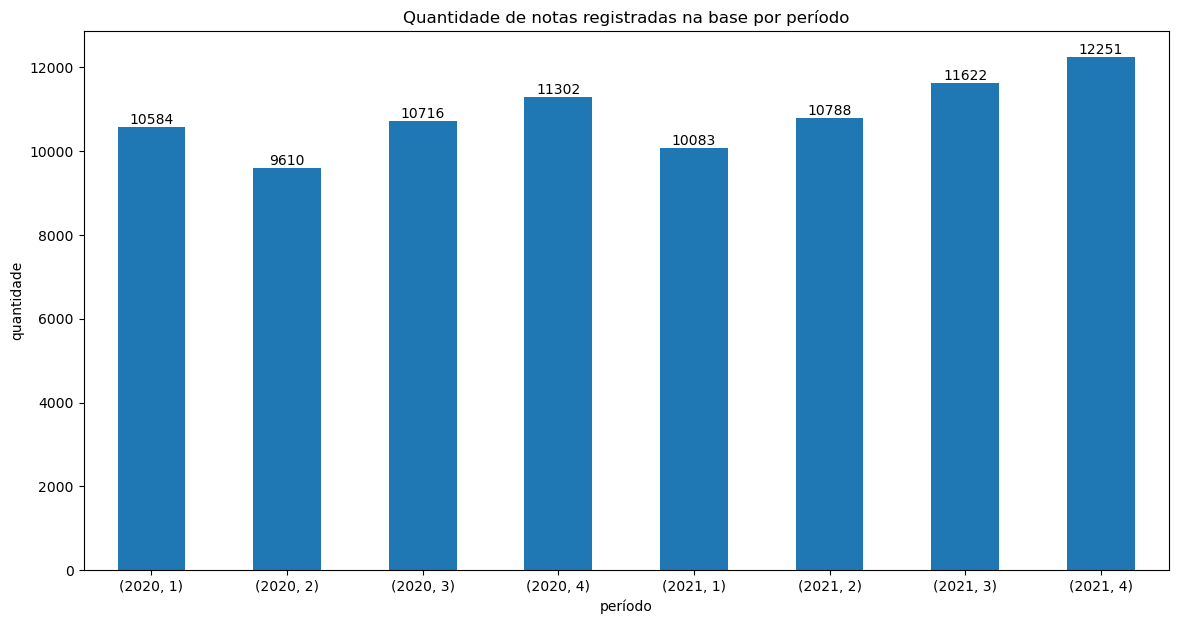

In [20]:
ax = df.groupby(by=["Ano", "Trimestre"])["No."].count().plot.bar(figsize=(14, 7))
# Agrupa o DataFrame por 'Ano' e 'Trimestre', contando o número de registros ('No.') e plota um gráfico de barras

ax.bar_label(ax.containers[0])  # Adiciona rótulos com os valores em cada barra

plt.title("Quantidade de notas registradas na base por período")  # Define o título do gráfico
plt.xlabel(xlabel="período")  # Define o rótulo do eixo X
plt.ylabel(ylabel="quantidade")  # Define o rótulo do eixo Y
plt.xticks(rotation=0)  # Define a rotação dos rótulos do eixo X para 0 graus
plt.show()  # Exibe o gráfico


In [21]:
# Cria uma nova coluna 'Periodo' concatenando as colunas 'Ano' e 'Trimestre' como strings
df = df.assign(Periodo=df[["Ano", "Trimestre"]].astype(dtype=str).agg('_'.join, axis=1))

# Agrupa o DataFrame por 'categoria' e 'Periodo', contando o número de registros ('No.') e renomeando a coluna resultante para 'Quantidade'
df_cat = df.groupby(by=["categoria", "Periodo"]).agg(Quantidade=("No.", "count")).reset_index()

# Exibe todas as linhas do DataFrame 'df_cat' sem limitação
with pd.option_context('display.max_rows', None):
    display(df_cat)


,categoria,Periodo,Quantidade
0,Alimentos,2020_1,701
1,Alimentos,2020_2,562
2,Alimentos,2020_3,553
3,Alimentos,2020_4,685
4,Alimentos,2021_1,581
5,Alimentos,2021_2,605
6,Alimentos,2021_3,674
7,Alimentos,2021_4,689
8,Auto posto,2020_1,88
9,Auto posto,2020_2,62


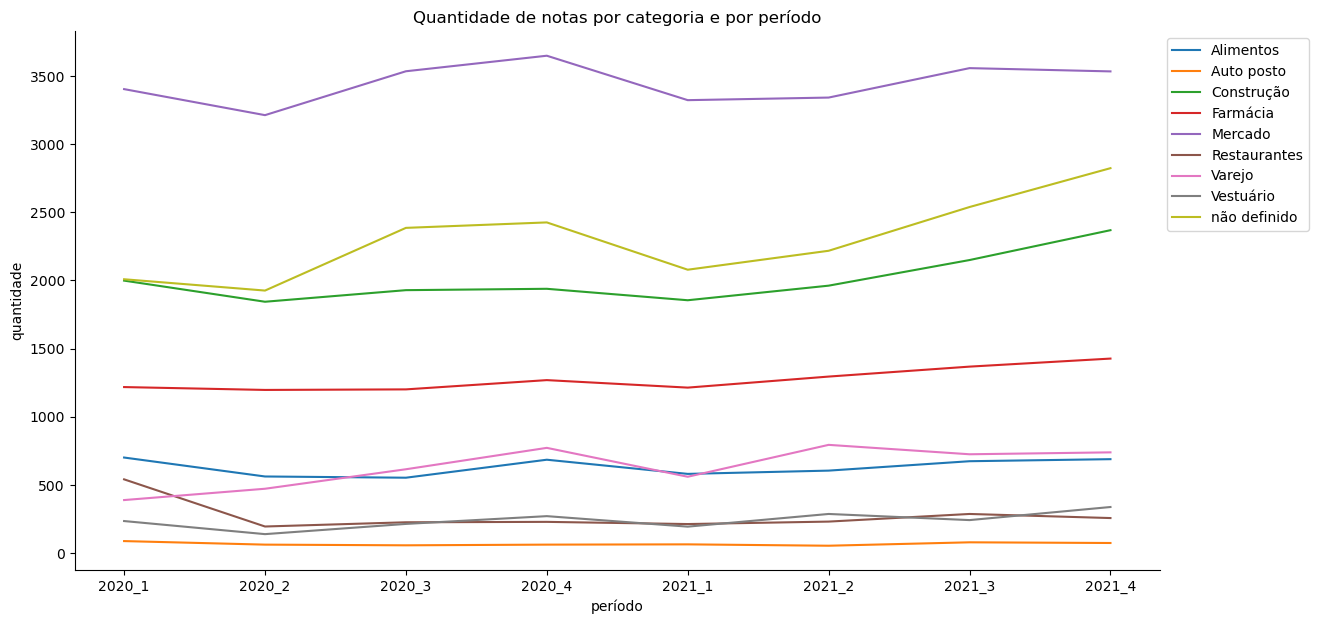

In [22]:
# Cria uma tabela dinâmica (pivot) com 'Periodo' como índice, 'categoria' como colunas e 'Quantidade' como valores,
# e plota um gráfico de linhas com os dados resultantes
ax = df_cat.pivot(index="Periodo", columns="categoria", values="Quantidade").plot.line(figsize=(14, 7))

plt.title("Quantidade de notas por categoria e por período")  # Define o título do gráfico
plt.xlabel(xlabel="período")  # Define o rótulo do eixo X
plt.ylabel(ylabel="quantidade")  # Define o rótulo do eixo Y
plt.xticks(rotation=0)  # Define a rotação dos rótulos do eixo X para 0 graus
plt.legend(bbox_to_anchor=(1, 1))  # Posiciona a legenda fora do gráfico
ax.spines[["top", "right"]].set_visible(False)  # Remove as bordas de cima e da direita do gráfico
plt.show()  # Exibe o gráfico


categoria,Alimentos,Auto posto,Construção,Farmácia,Mercado,Restaurantes,Varejo,Vestuário,não definido
Periodo,,,,,,,,,
2020_1,10.92%,0.48%,19.91%,4.95%,32.06%,9.85%,2.06%,1.64%,18.14%
2020_2,9.80%,0.56%,20.67%,6.71%,38.28%,4.10%,1.88%,0.62%,17.38%
2020_3,8.65%,0.38%,20.06%,6.03%,36.53%,4.16%,2.03%,0.97%,21.19%
2020_4,9.87%,0.28%,18.44%,9.71%,35.05%,3.49%,2.24%,1.25%,19.67%
2021_1,8.94%,0.26%,19.69%,9.00%,39.47%,3.06%,1.70%,0.87%,17.00%
2021_2,8.29%,0.17%,20.21%,12.38%,37.24%,3.28%,1.73%,1.22%,15.48%
2021_3,8.80%,0.45%,21.08%,12.77%,33.12%,4.02%,1.78%,1.44%,16.53%
2021_4,8.74%,0.34%,21.16%,13.35%,32.23%,3.17%,1.63%,1.29%,18.08%


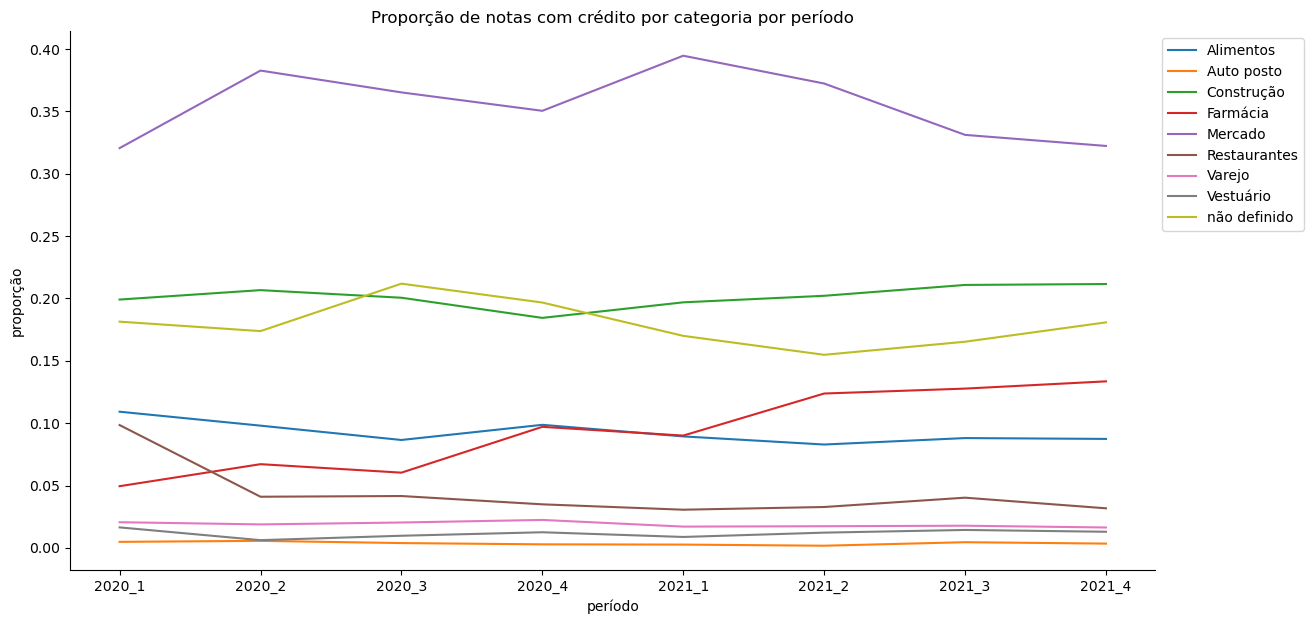

In [23]:
# Agrupa o DataFrame por 'categoria' e 'Periodo', somando a coluna 'flag_credito' e renomeando para 'Quantidade'
df_cat_credito = df.groupby(by=["categoria", "Periodo"])["flag_credito"].sum().reset_index(name='Quantidade')

# Cria uma tabela cruzada normalizada, mostrando a proporção de notas com crédito por categoria e por período
df_perc_cat_credito = pd.crosstab(
    index=df_cat_credito.Periodo, 
    columns=df_cat_credito.categoria, 
    values=df_cat_credito.Quantidade, 
    aggfunc="sum", 
    normalize="index"
)

# Exibe a tabela de proporções formatadas como percentual
display(df_perc_cat_credito.map(lambda x: f"{x:.2%}"))

# Plota um gráfico de linhas com as proporções de notas com crédito por categoria ao longo dos períodos
ax = df_perc_cat_credito.plot.line(figsize=(14, 7))
plt.title("Proporção de notas com crédito por categoria por período")  # Define o título do gráfico
plt.xlabel(xlabel="período")  # Define o rótulo do eixo X
plt.ylabel(ylabel="proporção")  # Define o rótulo do eixo Y
plt.legend(bbox_to_anchor=(1, 1))  # Posiciona a legenda fora do gráfico
ax.spines[["top", "right"]].set_visible(False)  # Remove as bordas de cima e da direita do gráfico
plt.show()  # Exibe o gráfico


---

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [26]:
# Cria uma tabela cruzada que conta a frequência de 'flag_credito' para cada combinação de 'Periodo' e 'categoria'
tab = pd.crosstab(index=[df["Periodo"], df["categoria"]], columns=df.flag_credito)

tab  # Exibe a tabela cruzada


flag_credito             0     1
Periodo categoria               
2020_1  Alimentos      202   499
        Auto posto      66    22
        Construção    1089   910
        Farmácia       992   226
        Mercado       1939  1465
...                    ...   ...
2021_4  Mercado       1837  1697
        Restaurantes    90   167
        Varejo         653    86
        Vestuário      270    68
        não definido  1872   952

[72 rows x 2 columns]

In [27]:
# Calcula o total de não eventos (flag_credito = 0) para cada período e adiciona como uma nova coluna
tab["total_nao_evento"] = tab.groupby(by="Periodo")[0].transform("sum")

# Calcula a proporção de não eventos para cada linha e adiciona como uma nova coluna
tab["perc_nao_evento"] = tab[0] / tab["total_nao_evento"]

# Calcula o total de eventos (flag_credito = 1) para cada período e adiciona como uma nova coluna
tab["total_evento"] = tab.groupby(by="Periodo")[1].transform("sum")

# Calcula a proporção de eventos para cada linha e adiciona como uma nova coluna
tab["perc_evento"] = tab[1] / tab["total_evento"]

# Calcula o Weight of Evidence (WOE) e adiciona como uma nova coluna
tab["WOE"] = np.log(tab["perc_evento"] / tab["perc_nao_evento"])

# Calcula o IV parcial para cada combinação de 'Periodo' e 'categoria' e adiciona como uma nova coluna
tab["IV parcial"] = (tab["perc_evento"] - tab["perc_nao_evento"]) * tab["WOE"]

# Exibe a tabela com todas as linhas, configurando a opção para mostrar todas as linhas
with pd.option_context("display.max_rows", len(tab)):
    display(tab)


flag_credito             0     1  total_nao_evento  perc_nao_evento  \
Periodo categoria                                                     
2020_1  Alimentos      202   499              6014         0.033588   
        Auto posto      66    22              6014         0.010974   
        Construção    1089   910              6014         0.181077   
        Farmácia       992   226              6014         0.164948   
        Mercado       1939  1465              6014         0.322414   
        Restaurantes    91   450              6014         0.015131   
        Varejo         295    94              6014         0.049052   
        Vestuário      160    75              6014         0.026605   
        não definido  1180   829              6014         0.196209   
2020_2  Alimentos      213   349              6049         0.035212   
        Auto posto      42    20              6049         0.006943   
        Construção    1108   736              6049         0.183171   
        Farmácia       958   239              6049         0.158373   
        Mercado       1850  1363              6049         0.305836   
        Restaurantes    49   146              6049         0.008101   
        Varejo         405    67              6049         0.066953   
        Vestuário      117    22              6049         0.019342   
        não definido  1307   619              6049         0.216069   
2020_3  Alimentos      170   383              6289         0.027031   
        Auto posto      40    17              6289         0.006360   
        Construção    1041   888              6289         0.165527   
        Farmácia       934   267              6289         0.148513   
        Mercado       1918  1617              6289         0.304977   
        Restaurantes    42   184              6289         0.006678   
        Varejo         525    90              6289         0.083479   
        Vestuário      171    43              6289         0.027190   
        não definido  1448   938              6289         0.230243   
2020_4  Alimentos      196   489              6346         0.030886   
        Auto posto      48    14              6346         0.007564   
        Construção    1025   914              6346         0.161519   
        Farmácia       788   481              6346         0.124173   
        Mercado       1912  1737              6346         0.301292   
        Restaurantes    56   173              6346         0.008824   
        Varejo         661   111              6346         0.104160   
        Vestuário      209    62              6346         0.032934   
        não definido  1451   975              6346         0.228648   
2021_1  Alimentos      172   409              5507         0.031233   
        Auto posto      52    12              5507         0.009443   
        Construção     954   901              5507         0.173234   
        Farmácia       802   412              5507         0.145633   
        Mercado       1517  1806              5507         0.275468   
        Restaurantes    73   140              5507         0.013256   
        Varejo         482    78              5507         0.087525   
        Vestuário      154    40              5507         0.027964   
        não definido  1301   778              5507         0.236245   
2021_2  Alimentos      218   387              6118         0.035633   
        Auto posto      46     8              6118         0.007519   
        Construção    1018   944              6118         0.166394   
        Farmácia       717   578              6118         0.117195   
        Mercado       1603  1739              6118         0.262014   
        Restaurantes    78   153              6118         0.012749   
        Varejo         713    81              6118         0.116541   
        Vestuário      230    57              6118         0.037594   
        não definido  1495   723              6118         0.244361   
2021_3  Alimentos      2

In [28]:
tab.columns.name = None  # Remove o nome das colunas da tabela cruzada

tab = tab.reset_index()  # Reseta o índice da tabela, transformando os índices em colunas regulares

tab  # Exibe a tabela resultante


,Periodo,categoria,0,1,total_nao_evento,perc_nao_evento,total_evento,perc_evento,WOE,IV parcial
0,2020_1,Alimentos,202,499,6014,0.033588,4570,0.109190,1.178915,0.089128
1,2020_1,Auto posto,66,22,6014,0.010974,4570,0.004814,-0.824035,0.005076
2,2020_1,Construção,1089,910,6014,0.181077,4570,0.199125,0.095006,0.001715
3,2020_1,Farmácia,992,226,6014,0.164948,4570,0.049453,-1.204611,0.139127
4,2020_1,Mercado,1939,1465,6014,0.322414,4570,0.320569,-0.005740,0.000011
...,...,...,...,...,...,...,...,...,...,...
67,2021_4,Mercado,1837,1697,6986,0.262954,5265,0.322317,0.203555,0.012084
68,2021_4,Restaurantes,90,167,6986,0.012883,5265,0.031719,0.901011,0.016971
69,2021_4,Varejo,653,86,6986,0.093473,5265,0.016334,-1.744403,0.134560
70,2021_4,Vestuário,270,68,6986,0.038649,5265,0.012915,-1.096087,0.028206


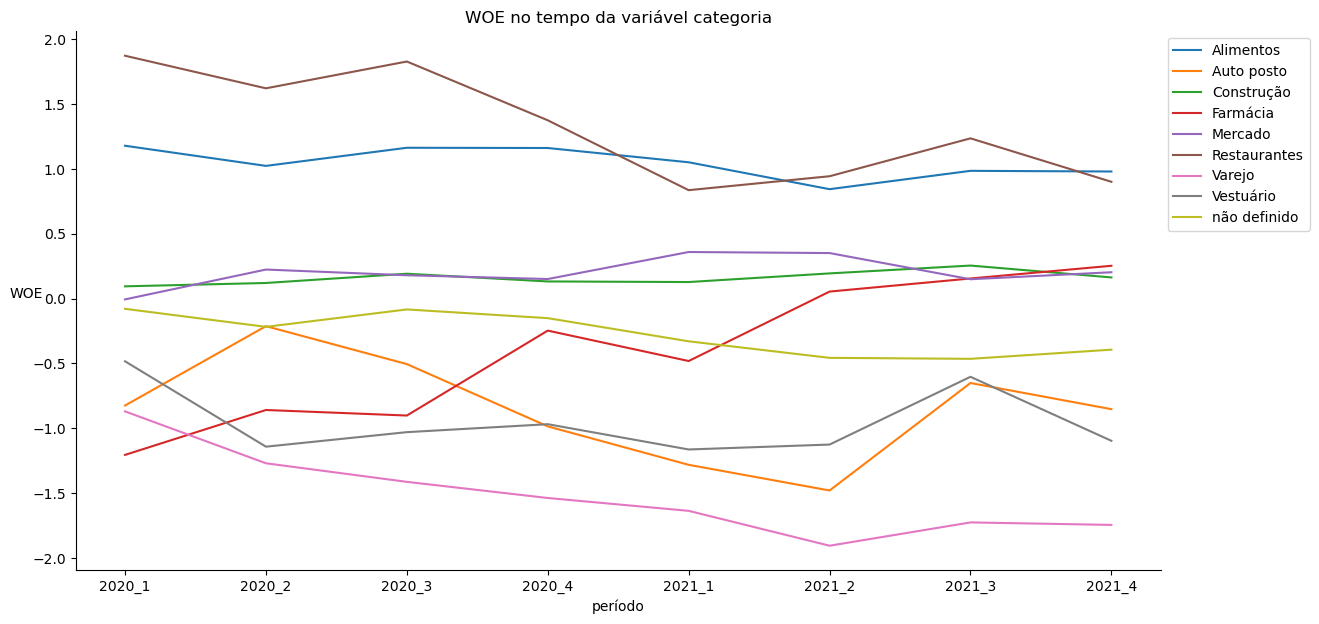

In [29]:
# Cria uma tabela dinâmica (pivot) com 'Periodo' como índice, 'categoria' como colunas e 'WOE' como valores,
# e plota um gráfico de linhas com os dados resultantes
ax = tab.pivot(columns="categoria", index="Periodo", values="WOE").plot.line(figsize=(14, 7))

plt.title("WOE no tempo da variável categoria")  # Define o título do gráfico
plt.xlabel(xlabel="período")  # Define o rótulo do eixo X
plt.ylabel(ylabel="WOE", rotation=0)  # Define o rótulo do eixo Y e a rotação do texto para 0 graus
plt.legend(bbox_to_anchor=(1, 1))  # Posiciona a legenda fora do gráfico
ax.spines[["top", "right"]].set_visible(False)  # Remove as bordas de cima e da direita do gráfico
plt.show()  # Exibe o gráfico


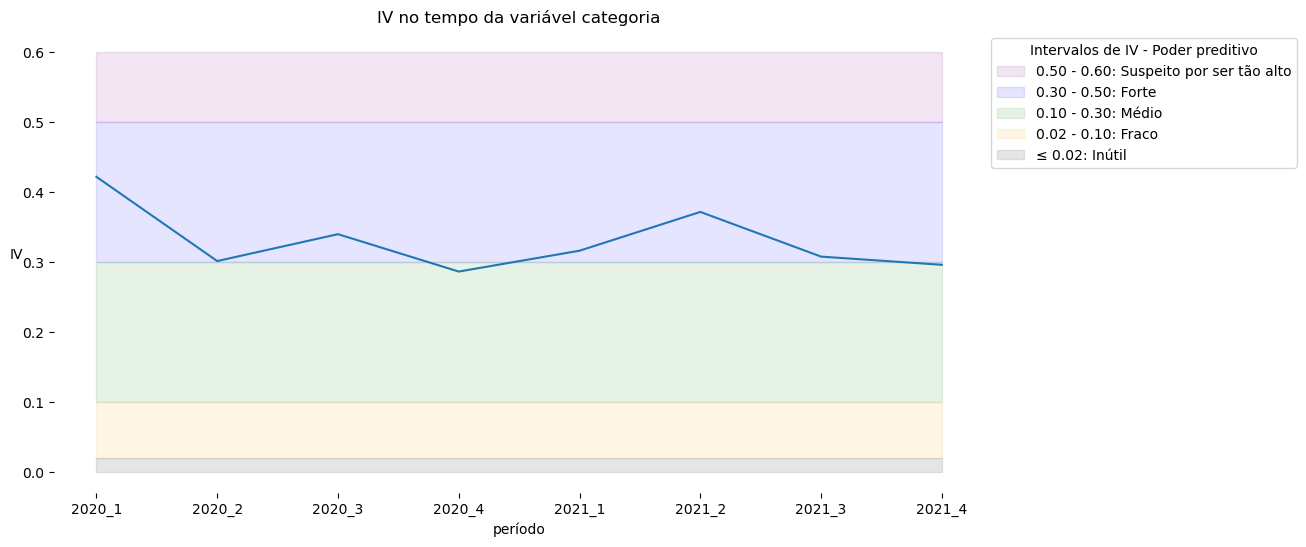

In [30]:
# Agrupa o DataFrame por 'Periodo' e soma os valores da coluna 'IV parcial', 
tab_iv = tab.groupby(by="Periodo")["IV parcial"].sum()

# Plota um gráfico de linhas com os resultados
ax = tab_iv.plot.line(figsize=(12, 6), label="")

plt.title("IV no tempo da variável categoria")  # Define o título do gráfico
plt.xlabel(xlabel="período")  # Define o rótulo do eixo X
plt.ylabel(ylabel="IV", rotation=0)  # Define o rótulo do eixo Y e a rotação do texto para 0 graus

# Define níveis de referência para preenchimento sob o gráfico
a = [.02] * len(tab_iv.index)  # Nível 1 de referência
b = [.1] * len(tab_iv.index)  # Nível 2 de referência
c = [.3] * len(tab_iv.index)  # Nível 3 de referência
d = [.5] * len(tab_iv.index)  # Nível 4 de referência
e = [.6] * len(tab_iv.index)  # Nível 5 de referência

# Preenche a área abaixo da linha do gráfico com diferentes cores para indicar intervalos de IV
ax.fill_between(x=tab_iv.index, y1=d, y2=e, color='purple', alpha=.1, label="0.50 - 0.60: Suspeito por ser tão alto")  # Nível 5
ax.fill_between(x=tab_iv.index, y1=c, y2=d, color='blue', alpha=.1, label="0.30 - 0.50: Forte")  # Nível 4
ax.fill_between(x=tab_iv.index, y1=b, y2=c, color='green', alpha=.1, label="0.10 - 0.30: Médio")  # Nível 3
ax.fill_between(x=tab_iv.index, y1=a, y2=b, color='orange', alpha=.1, label="0.02 - 0.10: Fraco")  # Nível 2
ax.fill_between(x=tab_iv.index, y1=a, color='grey', alpha=.2, label="≤ 0.02: Inútil")  # Nível 1

plt.legend(title="Intervalos de IV - Poder preditivo", bbox_to_anchor=(1, 1), loc="upper left")  # Adiciona a legenda ao lado do gráfico

ax.spines[:].set_visible(False)  # Remove todas as bordas do gráfico
plt.show()  # Exibe o gráfico


## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
> <font color="red">As categorias `Mercado`, `Construção` e categoria `não definida` apresentam as maiores proporções de notas com retornos acima de zero. Esses resultados sugerem que essas categorias têm um desempenho financeiro relativamente melhor em comparação com outras.</font>
- Essas diferenças são estáveis no tempo?
> <font color="red">As diferenças observadas nas proporções de notas com retornos acima de zero se mantêm estáveis ao longo do período de análise a partir de 2020, com pequenas oscilações. É importante considerar que, desde janeiro de 2020, o perfil do público parece ter se aproximado do público atual (2022), possivelmente devido a fatores como a pandemia e o crescimento do público. No entanto, ao analisar a base de dados como um todo, podemos notar um desbalanceamento significativo que pode influenciar os resultados de forma considerável.</font>

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

<font color="red">**Conclusão:** As categorias `Mercado`, `Construção` e categoria `não definida` destacam-se por apresentar a maior proporção de notas com retornos acima de zero. As diferenças nas proporções observadas a partir de 2020 se mantêm estáveis ao longo do tempo, com pequenas oscilações. Contudo, ao considerar a totalidade da base de dados, é evidente um desbalanceamento que pode impactar de forma significativa a análise.</font>

---